In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
dataset = pd.read_csv('diabetes.csv') 

X = dataset.iloc[:,:8].values 
Y = dataset.iloc[:, 8].values 


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=22)

In [33]:
# Problem 1
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

from sklearn.linear_model import LogisticRegression
# Creating the logistic model and fitting it
classifier = LogisticRegression(random_state=22) 
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.7532467532467533
Precision: 0.75
Recall: 0.4444444444444444


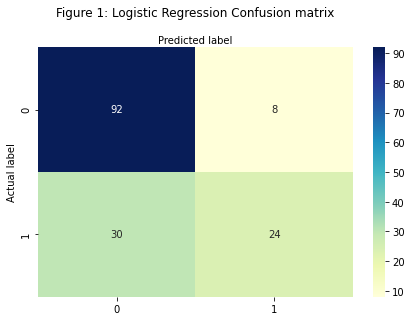

In [35]:
from matplotlib.colors import ListedColormap
class_names=[0,1]  
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Figure 1: Logistic Regression Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label');

In [36]:
# Problem 2
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

Accuracy: 0.7077922077922078
Precision: 0.6285714285714286
Recall: 0.4074074074074074


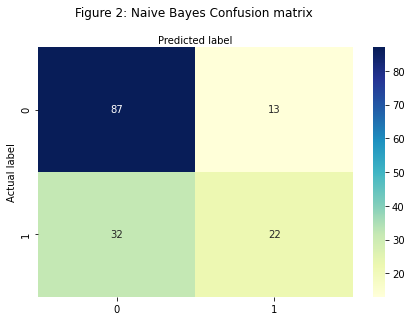

In [38]:
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Figure 2: Naive Bayes Confusion matrix ', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label');

In [27]:
# Problem 3
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
sc_X = StandardScaler() 
X = sc_X.fit_transform(X)

classifier = LogisticRegression(random_state=42)

metrics = ['accuracy', 'precision', 'recall']
kf = KFold(n_splits=5, random_state=22, shuffle=True)
scores1 = cross_validate(classifier, X, Y, scoring=metrics, cv=kf, n_jobs=-1)

kf = KFold(n_splits=10, random_state=22, shuffle=True)
scores2 = cross_validate(classifier, X, Y, scoring=metrics, cv=kf, n_jobs=-1)

In [28]:
print("Accuracy (K=5): ",scores1['test_accuracy'].mean())
print("Precision (K=5): ",scores1['test_precision'].mean())
print("Recall (K=5): ",scores1['test_recall'].mean())

print("Accuracy (K=10): ",scores2['test_accuracy'].mean())
print("Precision (K=10): ",scores2['test_precision'].mean())
print("Recall (K=10): ",scores2['test_recall'].mean())

Accuracy (K=5):  0.783795942619472
Precision (K=5):  0.743306229368686
Recall (K=5):  0.5807289342622872
Accuracy (K=10):  0.7799043062200958
Precision (K=10):  0.7413196575087069
Recall (K=10):  0.5717889307423512


In [29]:
# Problem 4

sc_X = StandardScaler() 
X = sc_X.fit_transform(X)

classifier = GaussianNB()

metrics = ['accuracy', 'precision', 'recall']
kf = KFold(n_splits=5, random_state=22, shuffle=True)
scores1 = cross_validate(classifier, X, Y, scoring=metrics, cv=kf, n_jobs=-1)

kf = KFold(n_splits=10, random_state=22, shuffle=True)
scores2 = cross_validate(classifier, X, Y, scoring=metrics, cv=kf, n_jobs=-1)

In [30]:
print("Accuracy (K=5): ",scores1['test_accuracy'].mean())
print("Precision (K=5): ",scores1['test_precision'].mean())
print("Recall (K=5): ",scores1['test_recall'].mean())

print("Accuracy (K=10): ",scores2['test_accuracy'].mean())
print("Precision (K=10): ",scores2['test_precision'].mean())
print("Recall (K=10): ",scores2['test_recall'].mean())

Accuracy (K=5):  0.7603768780239368
Precision (K=5):  0.6716070155788616
Recall (K=5):  0.6002407691280602
Accuracy (K=10):  0.7564593301435407
Precision (K=10):  0.6655626295347821
Recall (K=10):  0.6031094205870347
